Problem Statement

1.Read National bridge inventory data for 2023 csv file and plot it on a map

2.Perform a logistic regression to predict the probability of the Bridge elements being less than satisfactory

3. Visualize these using a map. Color code the probabilities to indicate risk of failure.

Solution

2. Set working directory
3. Convert DMS to Decimal Degrees Function
4. Applying Lambda Functions for DMS to DD Conversion
5. Create a GeoData frame
6. Set the CRS to NAD83 (EPSG:4269)
7. Plot bridges surveyed in 2023 on a Map

In [ ]:
# import libraries
import os as os
import pandas as pd
import numpy as np
import geopandas as gp
from matplotlib import pyplot as plt
from shapely.geometry import point
import matplotlib_map_utils as mapu
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

In [301]:
# Set the working directory
path = "D:\\Fall2024\\Miniproject\\FinalData"
os.chdir(path)

# Load the CSV data into a pandas DataFrame
df = pd.read_csv("D:\\Fall2024\\Miniproject\\FinalData\\TX23.csv", low_memory=False)

In [302]:
# Function to Convert DMS (Degrees, Minutes, Seconds) to Decimal Degrees 
def dms_to_dd(dms):
    dms = str(dms)  
    if len(dms) <= 8:
        degrees = int(dms[:2])
        minutes = int(dms[2:4])
        seconds = int(dms[4:6]) / 100
    else:
        degrees = int(dms[:3])
        minutes = int(dms[3:5])
        seconds = int(dms[5:7]) / 100
    dd = degrees + minutes / 60 + seconds / 3600
    return dd

In [305]:
#Using the lambda function to Column LAT16 AND LONG017 to Convert DMS to DD for latitude and longitude
df['LAT_016_DD'] = df['LAT_016'].apply(lambda x: dms_to_dd(str(x)))
df['LONG_017_DD'] = df['LONG_017'].apply(lambda x: -dms_to_dd(str(x)))

In [307]:
# Create a new column for the geometric point in df
df['geometry'] = df.apply(lambda row: f"POINT ({row['LONG_017_DD']} {row['LAT_016_DD']})", axis=1)

In [308]:
# Create a GeoDataFrame for the points
gdf_points = gp.GeoDataFrame(df, geometry=gp.points_from_xy(df['LONG_017_DD'], df['LAT_016_DD']))

In [309]:
# Set the CRS to NAD83 (EPSG:4269)
gdf_points.set_crs(epsg=4269, inplace=True)

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,LAT_016_DD,LONG_017_DD,geometry
0,48,0000000L2015318,1,6,4,0,0,0,375,0,...,2035,NaN,Y,68,G,7,169.84,35.300158,-101.933353,POINT (-101.93335 35.30016)
1,48,000021521-00101,1,6,0,0,0,2,71,0,...,2042,NaN,Y,63,F,6,150.72,29.600058,-94.450078,POINT (-94.45008 29.60006)
2,48,000021521-00181,1,6,0,0,0,2,71,0,...,2042,NaN,Y,63,G,7,74.40,29.600081,-94.416803,POINT (-94.4168 29.60008)
3,48,000021521-TMP20,1,6,1,0,0,2,71,0,...,2042,NaN,Y,63,G,7,91.91,29.600142,-94.533444,POINT (-94.53344 29.60014)
4,48,000021525-00012,1,6,0,0,0,2,245,0,...,2042,NaN,Y,63,P,4,204.30,29.683425,-94.066800,POINT (-94.0668 29.68342)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56308,48,DAPTRABLI018560,1,8,0,0,0,24,141,26664,...,2043,NaN,Y,74,G,7,3542.06,31.816814,-106.300094,POINT (-106.30009 31.81681)
56309,48,NCA1,1,6,0,0,0,0,113,19000,...,2041,NaN,Y,56,F,6,341.28,32.716672,-96.933367,POINT (-96.93337 32.71667)
56310,48,NCA2,1,6,0,0,0,0,113,19000,...,2041,NaN,Y,56,F,5,141.68,32.700136,-96.933342,POINT (-96.93334 32.70014)
56311,48,NCA3,1,6,0,0,0,0,113,19000,...,2041,NaN,Y,56,F,6,364.81,32.700125,-96.933369,POINT (-96.93337 32.70012)


In [313]:
# Save as a GeoPackage GPKG file
gdf_points.to_file("TX23POINTS.gpkg", driver='GPKG')

In [314]:
# Reading the Geopackgae files 
fname1 = "TX23POINTS.gpkg"  # Name of the bridges surveyed in 2023
fname2 = "Texasmap.gpkg"  # Name of Texas gpkg file

# Read the Geopackage file using geopandas
TX23POINTS = gp.read_file(fname1)  # Read the gpkg file
Texasmap = gp.read_file(fname2)  # Content of Texas maps 

# Check to confirm the new Geometry column
TX23POINTS.head(2)

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,LAT_016_DD,LONG_017_DD,geometry
0,48,0000000L2015318,1,6,4,0,0,0,375,0,...,2035,NaN,Y,68,G,7,169.84,35.300158,-101.933353,POINT (-101.93335 35.30016)
1,48,000021521-00101,1,6,0,0,0,2,71,0,...,2042,NaN,Y,63,F,6,150.72,29.600058,-94.450078,POINT (-94.45008 29.60006)


TypeError: north_arrow() got an unexpected keyword argument 'marker'

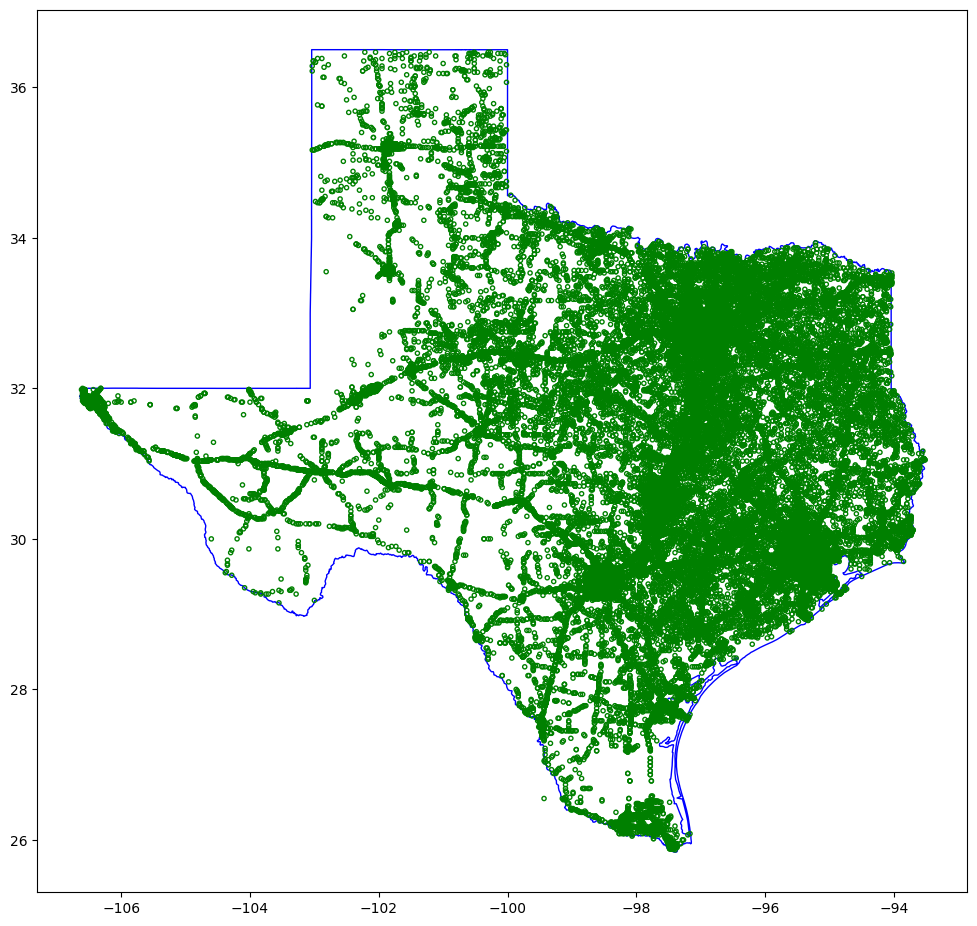

In [177]:
# Visualize the bridges surveyed in 2023 on a Map 
fig = plt.figure(figsize=(12, 18))
ax1 = fig.add_subplot() #we have multiple layers being added, so when we have to plot multiple layers on the plot, we need to make sure all of them are plotted on the same axis.
Texasmap.plot(ax=ax1, edgecolor='blue', facecolor = 'none', markersize=1)
TX23POINTS.plot (facecolor='none', edgecolor='green', ax=ax1, marker='.') #ax=ax1 - overlaping axis. 
mapu.north_arrow.north_arrow(a, marker='.', x=ax1, location='lower right', rotation={'degrees':0}) 
ax1.set_xlabel('Longitude ()')
ax1.set_ylabel('Latitude ((figsize=(6, 5))')
plt.grid()
plt.title ("Bridges Surveyed in 2023")
plt.show()

2. REGRESSION
1. Converting all colums to to numeric data forcing errors to NaN
2. Define and Apply a function to Categorize ratings in Satisfactory and Less Satiasfactory
3. Fill Missing Values
4. Convert Categorical Variables to Dummy Variables with One-Hot Encoding
5. Define target and feature columns
6. Split data into training and testing sets
7. Make Predictions

In [316]:
# Define the features and target
features = df[['YEAR_BUILT_027','STRUCTURE_KIND_043A','FUNCTIONAL_CLASS_026','ADT_029']]  # Independent variables
a = df[['DECK_COND_058', 'CULVERT_COND_062', 'CHANNEL_COND_061']] 
# Display the data of the selected columns
a.head(2)

,DECK_COND_058,CULVERT_COND_062,CHANNEL_COND_061
0,N,7,6
1,6,N,7


In [317]:
# Convert All Columns to Numeric with Error Handling in DataFrame
for column in features.columns:
    # Convert to numeric, coercing errors to NaN
    features.loc[:, column] = pd.to_numeric(features[column], errors='coerce')

In [319]:
for column in a.columns:
    # Convert to numeric, coercing errors to NaN
    a.loc[:, column] = pd.to_numeric(a[column], errors='coerce')

In [324]:
# Bridge Condition Categorization Function
def categorize_condition(value):
    if pd.isna(value):  # Check for NaN values
        return None  
    if 0 <= value <= 5:
        return 0  # Less than Satisfactory
    elif 6 <= value <= 9:
        return 1  # Satisfactory or better
    return None

In [326]:
# Applying Condition Categorization to Bridge Rating Columns
a['DECK_COND_058_Category'] = a['DECK_COND_058'].apply(categorize_condition)
a['CHANNEL_COND_061_Category'] = a['CHANNEL_COND_061'].apply(categorize_condition)
a['CULVERT_COND_062_Category'] = a['CULVERT_COND_062'].apply(categorize_condition)

C:\Users\User\AppData\Local\Temp\ipykernel_1708\3180434011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['DECK_COND_058_Category'] = a['DECK_COND_058'].apply(categorize_condition)
C:\Users\User\AppData\Local\Temp\ipykernel_1708\3180434011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['CHANNEL_COND_061_Category'] = a['CHANNEL_COND_061'].apply(categorize_condition)
C:\Users\User\AppData\Local\Temp\ipykernel_1708\3180434011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [328]:
a.head(2)

,DECK_COND_058,CULVERT_COND_062,CHANNEL_COND_061,DECK_COND_058_Category,CHANNEL_COND_061_Category,CULVERT_COND_062_Category
0,NaN,7.0,6.0,NaN,1.0,1.0
1,6.0,NaN,7.0,1.0,1.0,NaN


In [330]:
#Filling missing values 
features.ffill(inplace=True)  # Forward fill
features.bfill(inplace=True)  # Backward fill
a.ffill(inplace=True)  # Forward fill
a.bfill(inplace=True)  # Backward fill

C:\Users\User\AppData\Local\Temp\ipykernel_1708\116199504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.ffill(inplace=True)  # Forward fill
C:\Users\User\AppData\Local\Temp\ipykernel_1708\116199504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.bfill(inplace=True)  # Backward fill
C:\Users\User\AppData\Local\Temp\ipykernel_1708\116199504.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

In [332]:
# Confirming NaN values are fixed 
a.head(2)

,DECK_COND_058,CULVERT_COND_062,CHANNEL_COND_061,DECK_COND_058_Category,CHANNEL_COND_061_Category,CULVERT_COND_062_Category
0,6.0,7.0,6.0,1.0,1.0,1.0
1,6.0,7.0,7.0,1.0,1.0,1.0


In [334]:
# Check for missing values in each column
missing_values = a.isna().sum()

# Display the result
print(missing_values)

DECK_COND_058                0
CULVERT_COND_062             0
CHANNEL_COND_061             0
DECK_COND_058_Category       0
CHANNEL_COND_061_Category    0
CULVERT_COND_062_Category    0
dtype: int64


In [336]:
# Convert Categorical Variables to Dummy Variables with One-Hot Encoding
X = pd.get_dummies(a, drop_first=True)

In [350]:

# Define target and feature columns
y = a[['DECK_COND_058_Category', 'CHANNEL_COND_061_Category', 'CULVERT_COND_062_Category']]
X = features[['STRUCTURE_KIND_043A', 'FUNCTIONAL_CLASS_026', 'YEAR_BUILT_027', 'ADT_029']]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Convert back to DataFrame before encoding
X = pd.DataFrame(X, columns=['STRUCTURE_KIND_043A', 'FUNCTIONAL_CLASS_026', 'YEAR_BUILT_027', 'ADT_029'])

# Encode categorical features 
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Iterate through each target condition
for condition in y.columns:
    y_condition = y[condition]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_condition, test_size=0.2, random_state=42)

    # Train the logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    print(f"Evaluation for {condition}:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")


Evaluation for DECK_COND_058_Category:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       472
         1.0       0.96      1.00      0.98     10791

    accuracy                           0.96     11263
   macro avg       0.48      0.50      0.49     11263
weighted avg       0.92      0.96      0.94     11263

Accuracy: 0.9580928704608008



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluation for CHANNEL_COND_061_Category:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       888
         1.0       0.92      1.00      0.96     10375

    accuracy                           0.92     11263
   macro avg       0.46      0.50      0.48     11263
weighted avg       0.85      0.92      0.88     11263

Accuracy: 0.9211577732398117



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluation for CULVERT_COND_062_Category:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       497
         1.0       0.96      1.00      0.98     10766

    accuracy                           0.96     11263
   macro avg       0.48      0.50      0.49     11263
weighted avg       0.91      0.96      0.93     11263

Accuracy: 0.9558732131758857



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [241]:
# Combine the slices
combined_slices = pd.concat([a, features], axis=1)

# Add the combined slices to the main DataFrame
df = pd.concat([df, combined_slices], axis=1)

In [352]:
# Save your DataFrame to a CSV file
df.to_csv("D:\\Fall2024\\Miniproject\\FinalData\\NEWTX23.csv", index=False)
# Save as a GeoPackage GPKG file
gdf_points.to_file("NEWTX23.gpkg", driver='GPKG')

In [ ]:
# Read the Geopackage file using geopandas
NEWTX23 = gp.read_file(fname3)  # Read the gpkg file